In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import sys

import numpy as np
import pandas as pd
import datetime
import time

import requests
import re
from bs4 import BeautifulSoup
from time import sleep
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
from sklearn import cross_validation, datasets, linear_model, grid_search, metrics, ensemble, tree
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

/Users/mitdhami/anaconda/envs/cs189/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/mitdhami/anaconda/envs/cs189/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/mitdhami/anaconda/envs/cs189/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are mov

In [4]:
from pandas import Series, DataFrame, Panel
import scipy; 
import scipy.stats as stats; 
from scipy.stats import ttest_ind, ttest_ind_from_stats; from scipy.special import stdtr; 

In [5]:
test = pd.read_csv("incidents_2013-18.csv")

In [6]:
test.head()

,Unnamed: 0,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Y,Location,PdId,info,Zipcode,Density,LandArea,Population,TotalWages,Wealthy
0,0,9849,180258393,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Saturday,2018-04-07,21:55,BAYVIEW,"ARREST, BOOKED",...,37.764379,"(37.764379029213, -122.38792119559)",18025839319090,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94107,14859.776536,1.79,26599,1.310455e+09,49267.061356
1,1,9874,180258365,NON-CRIMINAL,FOUND PROPERTY,Saturday,2018-04-07,18:30,NORTHERN,NONE,...,37.779258,"(37.779258474435, -122.426832741986)",18025836572000,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94102,46531.343284,0.67,31176,4.808331e+08,15423.181229
2,2,9863,180256676,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Saturday,2018-04-07,07:56,BAYVIEW,NONE,...,37.750488,"(37.750487946115, -122.393463718795)",18025667628100,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94107,14859.776536,1.79,26599,1.310455e+09,49267.061356
3,3,9865,180258105,OTHER OFFENSES,RESISTING ARREST,Saturday,2018-04-07,19:18,NORTHERN,"ARREST, BOOKED",...,37.778659,"(37.778659154151, -122.416583456133)",18025810527170,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94102,46531.343284,0.67,31176,4.808331e+08,15423.181229
4,4,9866,180257834,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Saturday,2018-04-07,17:08,TARAVAL,"ARREST, BOOKED",...,37.747018,"(37.747017944125, -122.470512186116)",18025783465010,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94122,23738.559322,2.36,56023,1.466564e+09,26177.898131


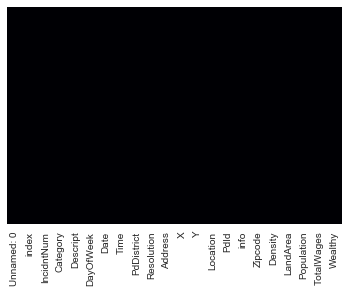

In [7]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False, cmap='magma');

In [8]:
test['DateTime'] = test[['Date','Time']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [9]:
test['DateTime'] = pd.to_datetime(test['DateTime'])

In [10]:
test = test[test['DateTime'] < '2018-01-01 00:00:00']

In [11]:
from pandas_datareader import data

In [12]:
test.head()

,Unnamed: 0,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Location,PdId,info,Zipcode,Density,LandArea,Population,TotalWages,Wealthy,DateTime
25558,25558,2178056,180003160,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Sunday,2017-12-31,16:00,MISSION,NONE,...,"(37.761470679105, -122.436107579123)",18000316005043,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00
25559,25559,2192860,186001495,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-12-31,09:30,SOUTHERN,NONE,...,"(37.771463083595, -122.409842564119)",18600149506372,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94103,19977.941176,1.36,27170,6.379968e+08,23481.662643,2017-12-31 09:30:00
25560,25560,2183606,186000378,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-12-31,23:30,SOUTHERN,NONE,...,"(37.779565846029, -122.398063445395)",18600037806372,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94158,7260.606061,0.66,4792,1.846001e+08,38522.555092,2017-12-31 23:30:00
25561,25561,2184294,180003160,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,2017-12-31,16:00,MISSION,NONE,...,"(37.761470679105, -122.436107579123)",18000316028150,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00
25562,25562,2178033,180006415,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,2017-12-31,19:00,RICHMOND,NONE,...,"(37.775206536734, -122.509644693774)",18000641564070,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94121,13377.597403,3.08,41203,1.197297e+09,29058.481154,2017-12-31 19:00:00


In [13]:
test.tail()

,Unnamed: 0,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Location,PdId,info,Zipcode,Density,LandArea,Population,TotalWages,Wealthy,DateTime
790299,790299,1545253,136001978,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,2013-01-01,18:30,TARAVAL,NONE,...,"(37.75855397868, -122.419441713847)",13600197806372,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94110,29756.652361,2.33,69333,1.906798e+09,27502.032914,2013-01-01 18:30:00
790300,790300,1436074,130004033,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Tuesday,2013-01-01,17:00,TARAVAL,NONE,...,"(37.719808872681, -122.479328709703)",13000403328100,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94132,9044.694534,3.11,28129,5.551385e+08,19735.450958,2013-01-01 17:00:00
790301,790301,1427757,130032595,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,2013-01-01,17:00,SOUTHERN,NONE,...,"(37.775420706711, -122.403404791479)",13003259506243,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94103,19977.941176,1.36,27170,6.379968e+08,23481.662643,2013-01-01 17:00:00
790302,790302,1434822,130003104,MISSING PERSON,FOUND PERSON,Tuesday,2013-01-01,22:00,INGLESIDE,NONE,...,"(37.732296855491, -122.443192261784)",13000310475000,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94131,12923.557692,2.08,26881,1.176467e+09,43765.741565,2013-01-01 22:00:00
790303,790303,1450428,130013501,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2013-01-01,17:00,RICHMOND,NONE,...,"(37.780621598365, -122.45084560938)",13001350107021,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94118,19650.769231,1.95,38319,1.578839e+09,41202.501083,2013-01-01 17:00:00


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764746 entries, 25558 to 790303
Data columns (total 23 columns):
Unnamed: 0    764746 non-null int64
index         764746 non-null int64
IncidntNum    764746 non-null int64
Category      764746 non-null object
Descript      764746 non-null object
DayOfWeek     764746 non-null object
Date          764746 non-null object
Time          764746 non-null object
PdDistrict    764745 non-null object
Resolution    764746 non-null object
Address       764746 non-null object
X             764746 non-null float64
Y             764746 non-null float64
Location      764746 non-null object
PdId          764746 non-null int64
info          764746 non-null object
Zipcode       764746 non-null int64
Density       764746 non-null float64
LandArea      764746 non-null float64
Population    764746 non-null int64
TotalWages    764746 non-null float64
Wealthy       764746 non-null float64
DateTime      764746 non-null datetime64[ns]
dtypes: datetime64[ns](1),

In [15]:
b1 = pd.read_csv("Business Count by Zipcode.csv")

In [16]:
b1.head()

,Unnamed: 0,Source Zipcode,NAICS Code Description,Counts
0,0,90230,Private Education and Health Services,1
1,1,90715,Accommodations,1
2,2,91104,Financial Services,1
3,3,91112,Real Estate and Rental and Leasing Services,1
4,4,91403,Private Education and Health Services,1


In [17]:
b1g = b1.pivot_table(index='Source Zipcode', values='Counts', aggfunc='sum')
b1g.tail()

,Counts
Source Zipcode,
96753,1
96815,1
98104,1
98108,1
99999,1


In [18]:
b1g['Counts'].max()

7721

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764746 entries, 25558 to 790303
Data columns (total 23 columns):
Unnamed: 0    764746 non-null int64
index         764746 non-null int64
IncidntNum    764746 non-null int64
Category      764746 non-null object
Descript      764746 non-null object
DayOfWeek     764746 non-null object
Date          764746 non-null object
Time          764746 non-null object
PdDistrict    764745 non-null object
Resolution    764746 non-null object
Address       764746 non-null object
X             764746 non-null float64
Y             764746 non-null float64
Location      764746 non-null object
PdId          764746 non-null int64
info          764746 non-null object
Zipcode       764746 non-null int64
Density       764746 non-null float64
LandArea      764746 non-null float64
Population    764746 non-null int64
TotalWages    764746 non-null float64
Wealthy       764746 non-null float64
DateTime      764746 non-null datetime64[ns]
dtypes: datetime64[ns](1),

In [20]:
b1g.head()

,Counts
Source Zipcode,
90230,1
90715,1
91104,1
91112,1
91403,1


In [21]:
test = test.merge(b1g, left_on = 'Zipcode', right_index = True)

In [22]:
test

,Unnamed: 0,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,PdId,info,Zipcode,Density,LandArea,Population,TotalWages,Wealthy,DateTime,Counts
25558,25558,2178056,180003160,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Sunday,2017-12-31,16:00,MISSION,NONE,...,18000316005043,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
25561,25561,2184294,180003160,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,2017-12-31,16:00,MISSION,NONE,...,18000316028150,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
25590,25590,2191863,176340162,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,2017-12-31,14:30,MISSION,NONE,...,17634016206224,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 14:30:00,4275
25598,25598,2181649,186000287,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-12-31,23:00,MISSION,NONE,...,18600028706372,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 23:00:00,4275
25630,25630,2177445,176340297,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2017-12-31,17:30,MISSION,NONE,...,17634029706244,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 17:30:00,4275
25639,25639,2131764,171055792,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Sunday,2017-12-31,16:00,MISSION,NONE,...,17105579271010,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
25667,25667,2182310,180000229,ASSAULT,THREATS AGAINST LIFE,Sunday,2017-12-31,23:02,MISSION,NONE,...,18000022919057,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 23:02:00,4275
25677,25677,2149424,171054073,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Sunday,2017-12-31,02:00,MISSION,"ARREST, BOOKED",...,17105407365010,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 02:00:00,4275
25689,25689,2158802,171054073,OTHER OFFENSES,TRAFFIC VIOLATION,Sunday,2017-12-31,02:00,MISSION,"ARREST, BOOKED",...,17105407365015,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 02:00:00,4275
25696,25696,2147893,171054835,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,2017-12-31,12:43,MISSION,NONE,...,17105483564020,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 12:43:00,4275


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764746 entries, 25558 to 789642
Data columns (total 24 columns):
Unnamed: 0    764746 non-null int64
index         764746 non-null int64
IncidntNum    764746 non-null int64
Category      764746 non-null object
Descript      764746 non-null object
DayOfWeek     764746 non-null object
Date          764746 non-null object
Time          764746 non-null object
PdDistrict    764745 non-null object
Resolution    764746 non-null object
Address       764746 non-null object
X             764746 non-null float64
Y             764746 non-null float64
Location      764746 non-null object
PdId          764746 non-null int64
info          764746 non-null object
Zipcode       764746 non-null int64
Density       764746 non-null float64
LandArea      764746 non-null float64
Population    764746 non-null int64
TotalWages    764746 non-null float64
Wealthy       764746 non-null float64
DateTime      764746 non-null datetime64[ns]
Counts        764746 non-n

In [24]:
test.describe()

,Unnamed: 0,index,IncidntNum,X,Y,PdId,Zipcode,Density,LandArea,Population,TotalWages,Wealthy,Counts
count,764746.000000,7.647460e+05,7.647460e+05,764746.000000,764746.000000,7.647460e+05,764746.000000,764746.000000,764746.000000,764746.000000,7.647460e+05,764746.000000,764746.000000
mean,407930.500000,1.793021e+06,1.517158e+08,-122.423406,37.768467,1.517158e+13,94113.300725,26576.063288,1.551957,32838.093563,9.816802e+08,41796.532389,4511.375153
std,220763.298819,2.305562e+05,1.634086e+07,0.025965,0.023750,1.634086e+12,10.902361,14351.047990,1.142381,18309.524955,5.356903e+08,46157.710542,1710.877062
min,25558.000000,0.000000e+00,1.300164e+06,-122.513642,37.707879,1.300165e+11,94014.000000,1383.913043,0.080000,406.000000,3.324633e+07,11543.863542,9.000000
25%,216744.250000,1.603793e+06,1.403413e+08,-122.434004,37.755367,1.403413e+13,94104.000000,16871.814672,0.670000,26237.000000,5.165775e+08,23481.662643,3675.000000
50%,407930.500000,1.795230e+06,1.506954e+08,-122.416916,37.775421,1.506954e+13,94110.000000,22635.294118,1.360000,31176.000000,6.994767e+08,28489.697946,4262.000000
75%,599116.750000,1.986423e+06,1.609905e+08,-122.406619,37.784914,1.609905e+13,94118.000000,46531.343284,2.330000,39169.000000,1.466564e+09,49267.061356,5813.000000
max,790303.000000,2.193543e+06,9.913497e+08,-122.365241,37.819975,9.913497e+13,94158.000000,50992.592593,6.310000,79407.000000,1.906798e+09,282913.581281,7721.000000


In [25]:
test['PdDistrict'].value_counts()

SOUTHERN      145101
MISSION       100443
NORTHERN       97762
CENTRAL        87346
BAYVIEW        71687
INGLESIDE      62557
TARAVAL        56667
TENDERLOIN     53812
PARK           45398
RICHMOND       43972
Name: PdDistrict, dtype: int64

In [26]:
test['Category'].value_counts()

LARCENY/THEFT                  204677
OTHER OFFENSES                  98555
NON-CRIMINAL                    94911
ASSAULT                         65329
VANDALISM                       40111
VEHICLE THEFT                   33438
WARRANTS                        31862
BURGLARY                        29842
SUSPICIOUS OCC                  28314
DRUG/NARCOTIC                   23987
MISSING PERSON                  22686
ROBBERY                         18024
FRAUD                           14058
SECONDARY CODES                  9802
WEAPON LAWS                      8114
TRESPASS                         7082
STOLEN PROPERTY                  4968
SEX OFFENSES, FORCIBLE           4522
FORGERY/COUNTERFEITING           3554
RECOVERED VEHICLE                3130
DRUNKENNESS                      2954
PROSTITUTION                     2683
DISORDERLY CONDUCT               2418
DRIVING UNDER THE INFLUENCE      1936
KIDNAPPING                       1857
ARSON                            1424
RUNAWAY     

In [27]:
district_location = pd.DataFrame(test.groupby('PdDistrict').size().sort_values(ascending=False).rename('Count').reset_index())
district_location.head()

,PdDistrict,Count
0,SOUTHERN,145101
1,MISSION,100443
2,NORTHERN,97762
3,CENTRAL,87346
4,BAYVIEW,71687


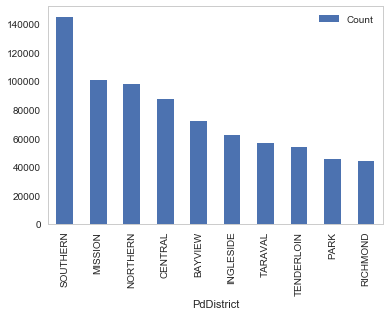

In [28]:
district_location.plot(x='PdDistrict',y='Count',kind='bar')

In [29]:
crime_type = pd.DataFrame(test.groupby('Category').size().sort_values(ascending=False).rename('Count').reset_index())
crime_type.head()

,Category,Count
0,LARCENY/THEFT,204677
1,OTHER OFFENSES,98555
2,NON-CRIMINAL,94911
3,ASSAULT,65329
4,VANDALISM,40111


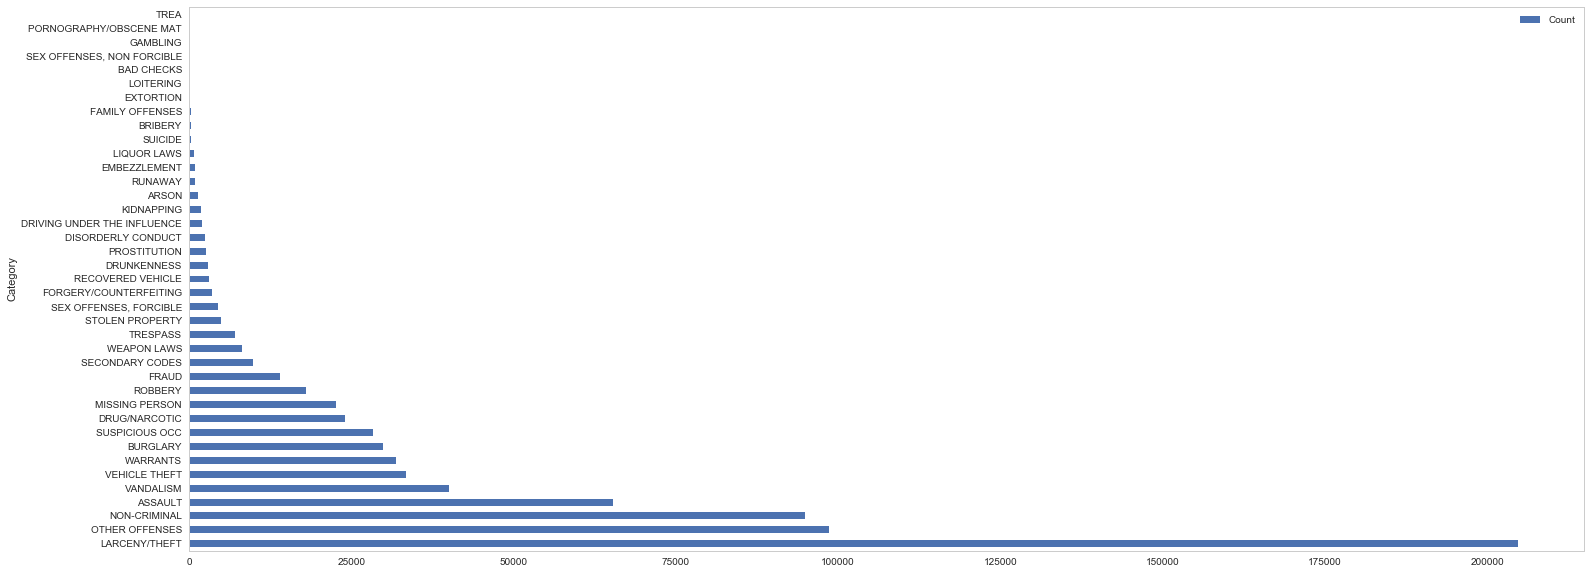

In [30]:
crime_type.plot(x='Category',y='Count',kind='barh',figsize=(25,10))

In [31]:
test.index = pd.DatetimeIndex(test.DateTime)

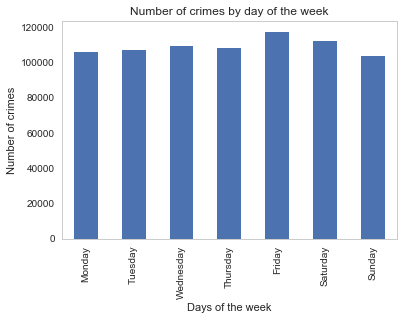

In [32]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
test.groupby([test.index.dayofweek]).size().plot(kind='bar')
plt.xlabel('Days of the week')
plt.xticks(np.arange(7), days)
plt.ylabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

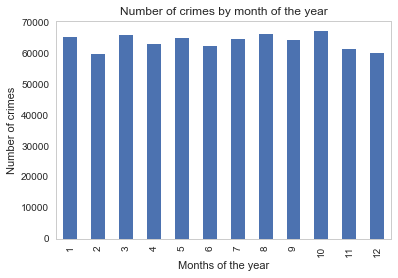

In [33]:
test.groupby([test.index.month]).size().plot(kind='bar')
plt.xlabel('Months of the year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()


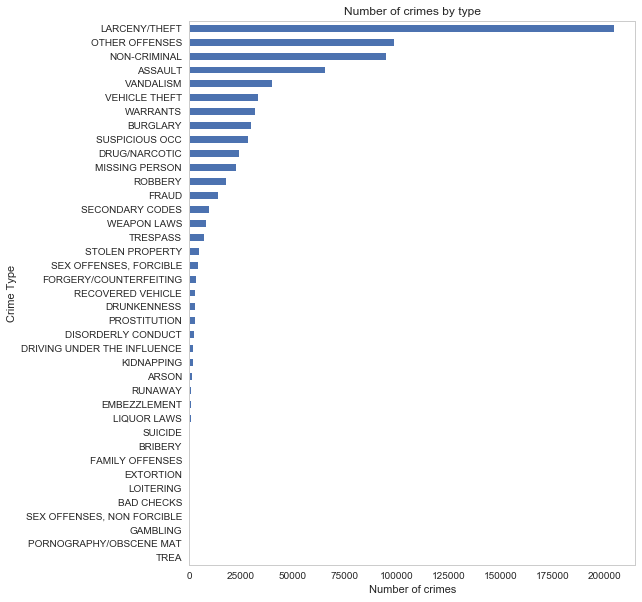

In [34]:
plt.figure(figsize=(8,10))
test.groupby([test['Category']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

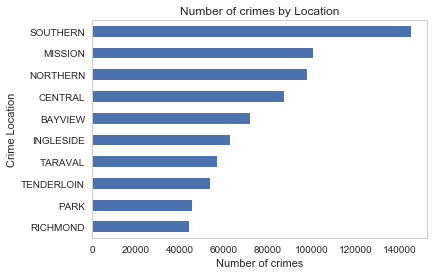

In [35]:
test.groupby([test['PdDistrict']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [36]:
test.head()

,Unnamed: 0,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,PdId,info,Zipcode,Density,LandArea,Population,TotalWages,Wealthy,DateTime,Counts
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-12-31 16:00:00,25558,2178056,180003160,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Sunday,2017-12-31,16:00,MISSION,NONE,...,18000316005043,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
2017-12-31 16:00:00,25561,2184294,180003160,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,2017-12-31,16:00,MISSION,NONE,...,18000316028150,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
2017-12-31 14:30:00,25590,2191863,176340162,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,2017-12-31,14:30,MISSION,NONE,...,17634016206224,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 14:30:00,4275
2017-12-31 23:00:00,25598,2181649,186000287,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-12-31,23:00,MISSION,NONE,...,18600028706372,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 23:00:00,4275
2017-12-31 17:30:00,25630,2177445,176340297,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2017-12-31,17:30,MISSION,NONE,...,17634029706244,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 17:30:00,4275


In [37]:
locationhour = test.pivot_table(values='index', index= test.index.hour, columns= 'PdDistrict', aggfunc=np.size).fillna(0)

In [38]:
locationhour

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
DateTime,,,,,,,,,,
0,3604,4189,3254,5764,5046,1746,2323,6545,2820,2480
1,1696,2736,1753,4076,3416,1015,1065,3893,1281,1417
2,1431,2284,1477,3203,2602,787,837,3144,1114,1232
3,1119,1380,1134,2204,1863,679,564,2104,856,877
4,889,975,792,1577,1308,474,433,1524,602,614
5,826,982,696,1263,1083,440,434,1377,527,748
6,1197,1121,847,1602,1534,711,561,2188,803,1174
7,2140,1690,1630,2299,2130,1564,924,3633,1381,1499
8,3022,2590,2248,3352,3188,1909,1479,4878,2256,1887


In [39]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [40]:
nlocationhour = normalize(locationhour)

In [41]:
nlocationhour

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
DateTime,,,,,,,,,,
0,0.704718,0.637825,0.745338,0.934205,0.744785,0.481209,0.746151,0.589214,0.648656,0.628918
1,0.220700,0.349474,0.307984,0.583852,0.438451,0.211864,0.249507,0.286854,0.213296,0.270644
2,0.153475,0.259774,0.227564,0.402657,0.285473,0.127856,0.159495,0.201459,0.166054,0.208291
3,0.074328,0.080373,0.127622,0.195309,0.146589,0.088062,0.051717,0.082887,0.093069,0.088642
4,0.015982,0.000000,0.027972,0.065172,0.042285,0.012528,0.000000,0.016760,0.021216,0.000000
5,0.000000,0.001389,0.000000,0.000000,0.000000,0.000000,0.000395,0.000000,0.000000,0.045163
6,0.094115,0.028974,0.043998,0.070361,0.084759,0.099853,0.050533,0.092464,0.078076,0.188743
7,0.333333,0.141893,0.272145,0.215027,0.196768,0.414149,0.193841,0.257211,0.241584,0.298281
8,0.557078,0.320500,0.452214,0.433582,0.395602,0.541268,0.412949,0.399156,0.489109,0.429053


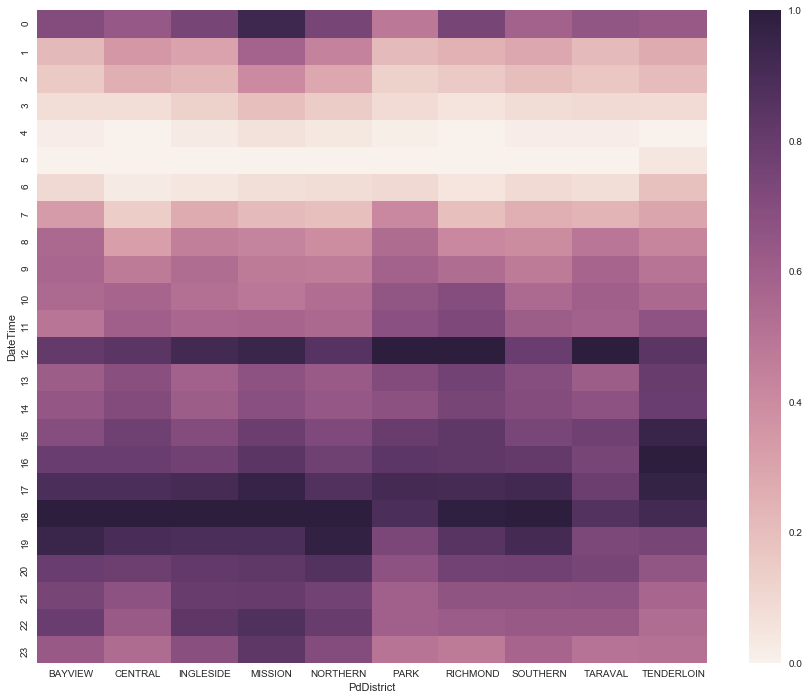

In [42]:
plt.figure(figsize=(15,12))
sns.heatmap(nlocationhour);

In [43]:
crimetypehour   = test.pivot_table(values='index', index= test.index.hour, columns= 'Category', aggfunc=np.size).fillna(0)

In [44]:
ncrimetypehour = normalize(crimetypehour)

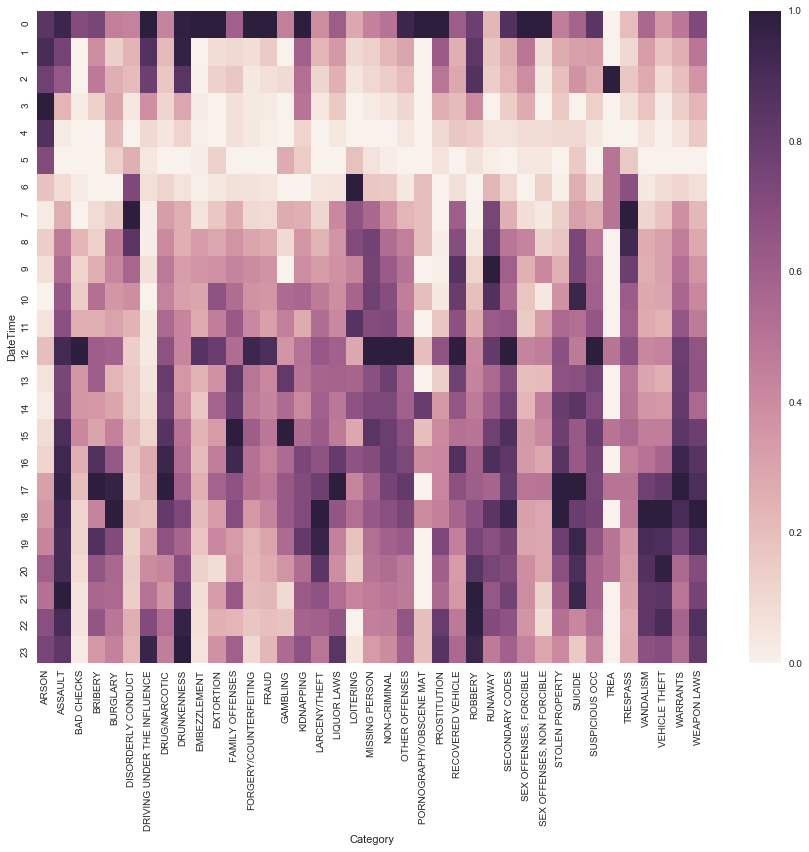

In [45]:
plt.figure(figsize=(15,12))
sns.heatmap(ncrimetypehour);

In [46]:
crimetypeday = test.pivot_table(values='index', index=test.index.weekday_name, columns='Category', aggfunc=np.size).fillna(0)

In [47]:
ncrimetypeday = normalize(crimetypeday)

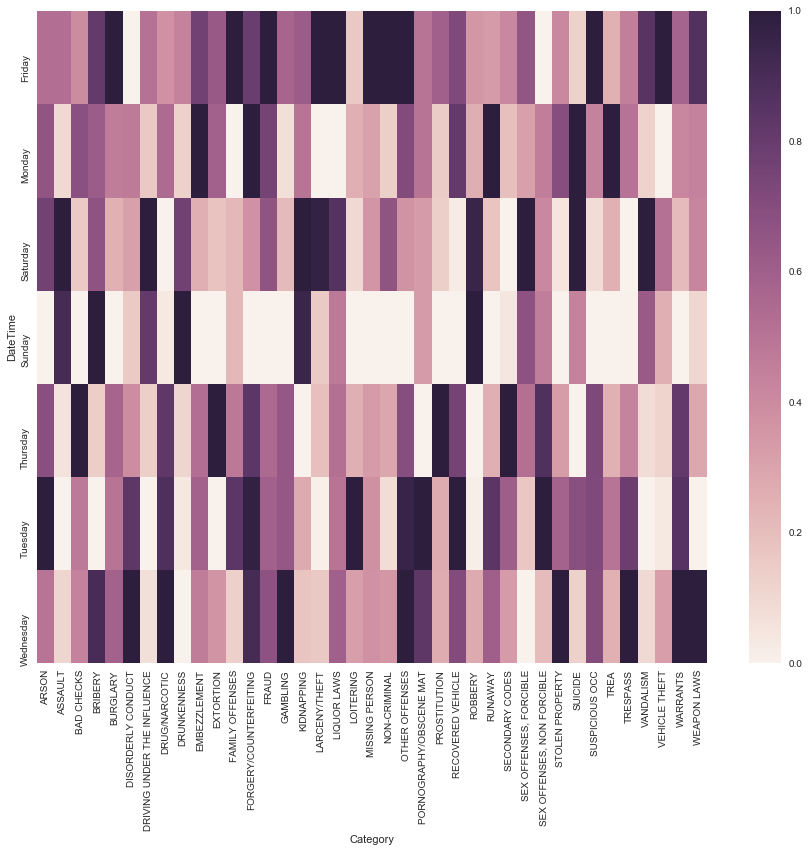

In [48]:
plt.figure(figsize=(15,12))
sns.heatmap(ncrimetypeday);

In [49]:
crimetypelocation  = test.pivot_table(values='index', index='PdDistrict', columns='Category', aggfunc=np.size).fillna(0)

In [50]:
ncrimetypelocation = normalize(crimetypelocation)

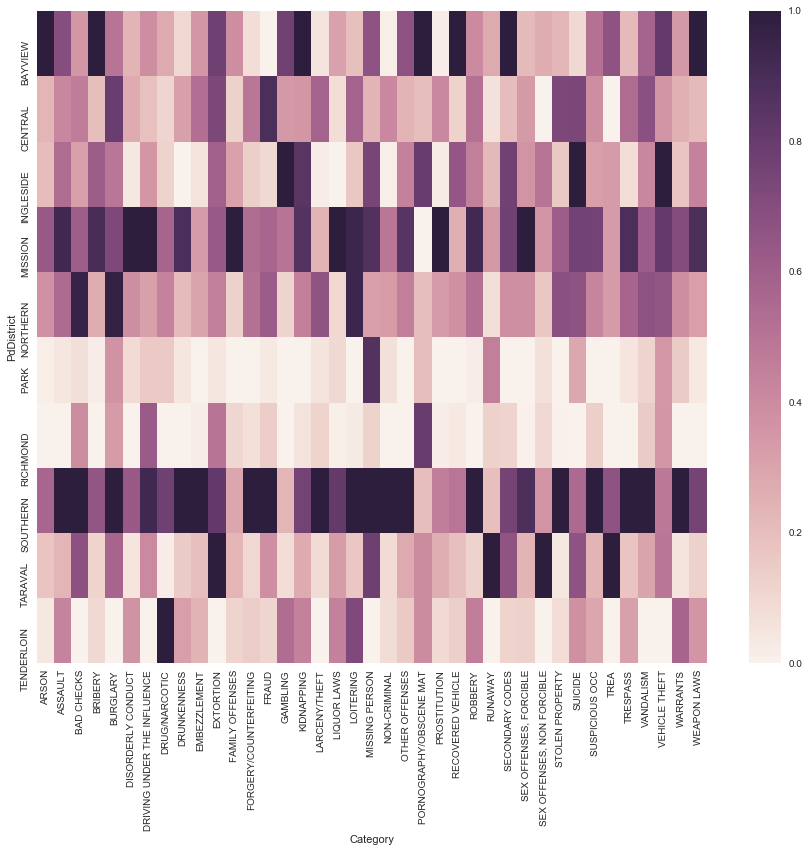

In [51]:
plt.figure(figsize=(15,12))
sns.heatmap(ncrimetypelocation);

In [52]:
test.head()

,Unnamed: 0,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,PdId,info,Zipcode,Density,LandArea,Population,TotalWages,Wealthy,DateTime,Counts
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-12-31 16:00:00,25558,2178056,180003160,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Sunday,2017-12-31,16:00,MISSION,NONE,...,18000316005043,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
2017-12-31 16:00:00,25561,2184294,180003160,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,2017-12-31,16:00,MISSION,NONE,...,18000316028150,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
2017-12-31 14:30:00,25590,2191863,176340162,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,2017-12-31,14:30,MISSION,NONE,...,17634016206224,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 14:30:00,4275
2017-12-31 23:00:00,25598,2181649,186000287,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-12-31,23:00,MISSION,NONE,...,18600028706372,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 23:00:00,4275
2017-12-31 17:30:00,25630,2177445,176340297,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2017-12-31,17:30,MISSION,NONE,...,17634029706244,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 17:30:00,4275


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764746 entries, 2017-12-31 16:00:00 to 2013-01-02 03:20:00
Data columns (total 24 columns):
Unnamed: 0    764746 non-null int64
index         764746 non-null int64
IncidntNum    764746 non-null int64
Category      764746 non-null object
Descript      764746 non-null object
DayOfWeek     764746 non-null object
Date          764746 non-null object
Time          764746 non-null object
PdDistrict    764745 non-null object
Resolution    764746 non-null object
Address       764746 non-null object
X             764746 non-null float64
Y             764746 non-null float64
Location      764746 non-null object
PdId          764746 non-null int64
info          764746 non-null object
Zipcode       764746 non-null int64
Density       764746 non-null float64
LandArea      764746 non-null float64
Population    764746 non-null int64
TotalWages    764746 non-null float64
Wealthy       764746 non-null float64
DateTime      764746 non-null datetime64[

In [54]:
crimetypezip  = test.pivot_table(values='index', index='Zipcode', columns='Category', aggfunc=np.size).fillna(0)

In [55]:
crimetypezip

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Zipcode,,,,,,,,,,,,,,,,,,,,,
94014,0.0,28.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,9.0,0.0,1.0,15.0,19.0,2.0,2.0
94102,135.0,8338.0,17.0,24.0,2345.0,402.0,151.0,7288.0,253.0,54.0,...,9.0,679.0,35.0,3212.0,1.0,905.0,3861.0,2399.0,5583.0,1101.0
94103,155.0,7895.0,18.0,54.0,2452.0,491.0,265.0,4169.0,476.0,93.0,...,12.0,708.0,29.0,3337.0,0.0,1037.0,4645.0,2337.0,5436.0,1088.0
94104,30.0,1723.0,11.0,3.0,927.0,56.0,37.0,268.0,64.0,65.0,...,3.0,132.0,5.0,862.0,1.0,333.0,1108.0,354.0,739.0,144.0
94105,24.0,900.0,2.0,3.0,588.0,46.0,42.0,106.0,48.0,11.0,...,2.0,74.0,3.0,385.0,0.0,149.0,877.0,547.0,249.0,81.0
94107,73.0,2294.0,3.0,14.0,1403.0,155.0,75.0,748.0,71.0,38.0,...,6.0,178.0,17.0,1313.0,1.0,553.0,2006.0,1828.0,1276.0,401.0
94108,109.0,6468.0,9.0,24.0,2305.0,213.0,70.0,2613.0,397.0,192.0,...,6.0,475.0,38.0,2597.0,1.0,921.0,2969.0,1411.0,4236.0,610.0
94109,44.0,2568.0,7.0,9.0,1829.0,85.0,65.0,1039.0,94.0,25.0,...,4.0,276.0,21.0,1096.0,0.0,357.0,1767.0,1505.0,1244.0,234.0
94110,99.0,4639.0,5.0,24.0,1735.0,287.0,180.0,844.0,277.0,50.0,...,11.0,215.0,20.0,1686.0,1.0,291.0,2251.0,3045.0,1762.0,720.0


In [56]:
ncrimetypezip = normalize(crimetypezip)

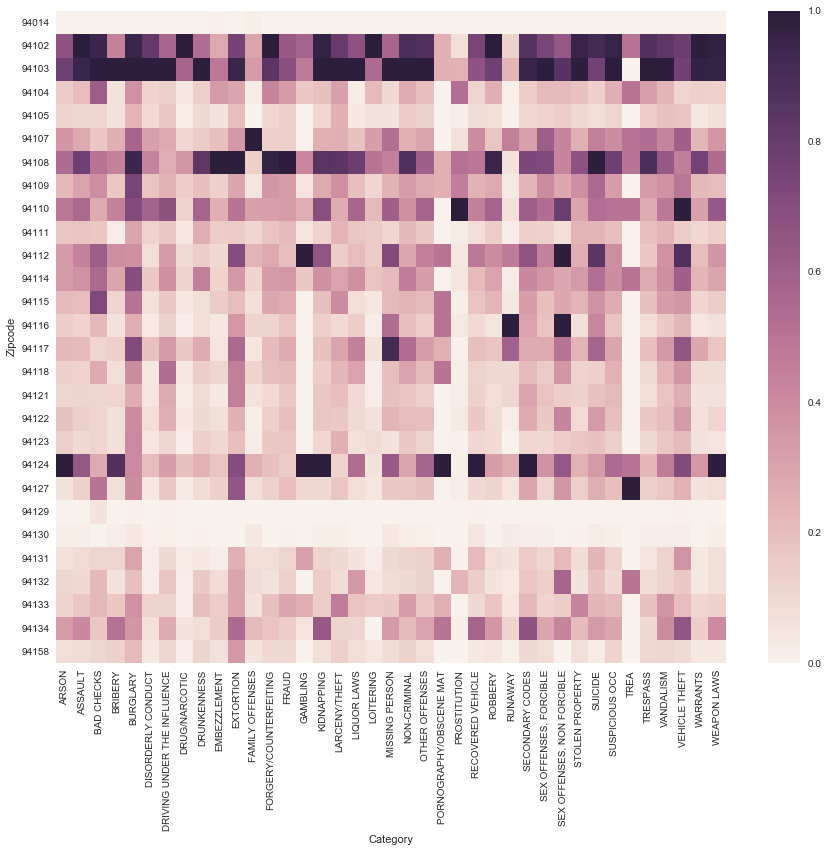

In [57]:
plt.figure(figsize=(15,12))
sns.heatmap(ncrimetypezip);

In [58]:
crimetypewealth  = test.pivot_table(values='index', index='Wealthy', columns='Category', aggfunc=np.size).fillna(0)

In [59]:
crimetypewealth

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Wealthy,,,,,,,,,,,,,,,,,,,,,
11543.863542,3.0,130.0,0.0,1.0,91.0,2.0,3.0,8.0,2.0,0.0,...,0.0,3.0,1.0,59.0,0.0,22.0,105.0,74.0,13.0,16.0
13046.134663,201.0,5367.0,5.0,47.0,991.0,100.0,86.0,1392.0,118.0,34.0,...,9.0,175.0,13.0,1828.0,1.0,233.0,2176.0,2173.0,1945.0,1123.0
15423.181229,135.0,8338.0,17.0,24.0,2345.0,402.0,151.0,7288.0,253.0,54.0,...,9.0,679.0,35.0,3212.0,1.0,905.0,3861.0,2399.0,5583.0,1101.0
16602.798372,66.0,3444.0,3.0,28.0,879.0,33.0,73.0,401.0,37.0,29.0,...,6.0,148.0,13.0,999.0,0.0,100.0,1868.0,1998.0,788.0,457.0
18441.943280,67.0,3666.0,11.0,21.0,931.0,40.0,89.0,683.0,67.0,18.0,...,14.0,186.0,32.0,1298.0,0.0,173.0,1768.0,2671.0,1125.0,409.0
18687.477262,0.0,28.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,9.0,0.0,1.0,15.0,19.0,2.0,2.0
19735.450958,22.0,796.0,4.0,3.0,479.0,10.0,46.0,164.0,75.0,17.0,...,8.0,40.0,7.0,328.0,1.0,93.0,557.0,515.0,230.0,82.0
23481.662643,155.0,7895.0,18.0,54.0,2452.0,491.0,265.0,4169.0,476.0,93.0,...,12.0,708.0,29.0,3337.0,0.0,1037.0,4645.0,2337.0,5436.0,1088.0
26177.898131,37.0,1168.0,2.0,4.0,975.0,38.0,68.0,258.0,48.0,14.0,...,6.0,62.0,13.0,650.0,0.0,163.0,942.0,1024.0,364.0,126.0


In [60]:
ncrimetypewealth = normalize(crimetypewealth)

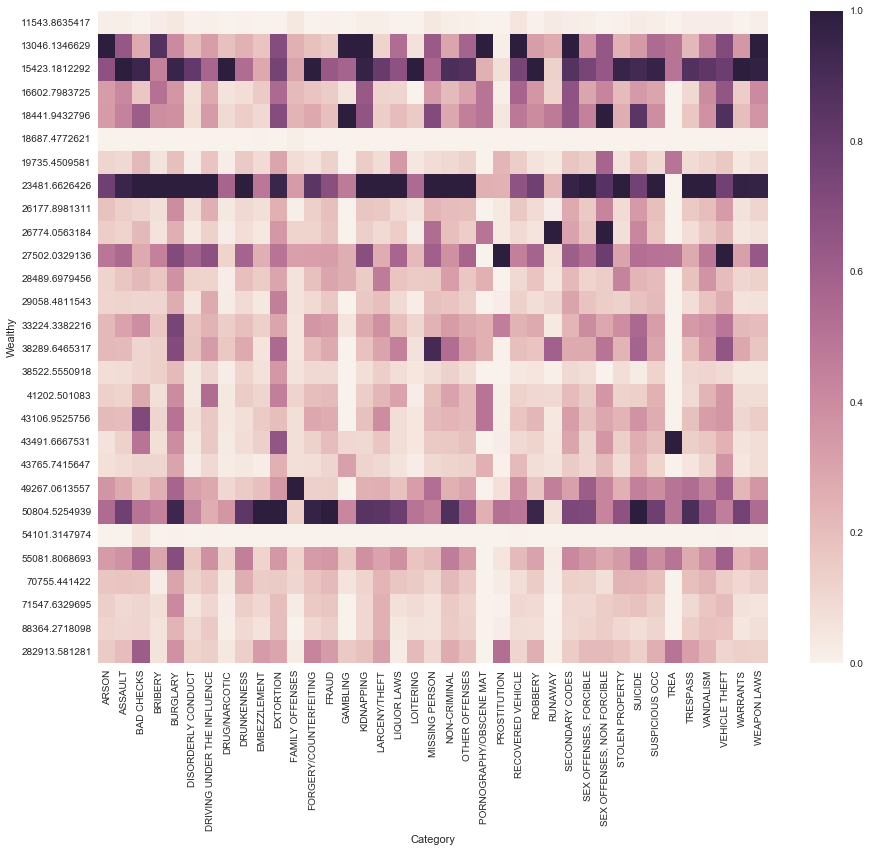

In [61]:
plt.figure(figsize=(15,12))
sns.heatmap(ncrimetypewealth);

In [62]:
test.head()

,Unnamed: 0,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,PdId,info,Zipcode,Density,LandArea,Population,TotalWages,Wealthy,DateTime,Counts
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-12-31 16:00:00,25558,2178056,180003160,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Sunday,2017-12-31,16:00,MISSION,NONE,...,18000316005043,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
2017-12-31 16:00:00,25561,2184294,180003160,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,2017-12-31,16:00,MISSION,NONE,...,18000316028150,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
2017-12-31 14:30:00,25590,2191863,176340162,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,2017-12-31,14:30,MISSION,NONE,...,17634016206224,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 14:30:00,4275
2017-12-31 23:00:00,25598,2181649,186000287,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-12-31,23:00,MISSION,NONE,...,18600028706372,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 23:00:00,4275
2017-12-31 17:30:00,25630,2177445,176340297,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2017-12-31,17:30,MISSION,NONE,...,17634029706244,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 17:30:00,4275


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764746 entries, 2017-12-31 16:00:00 to 2013-01-02 03:20:00
Data columns (total 24 columns):
Unnamed: 0    764746 non-null int64
index         764746 non-null int64
IncidntNum    764746 non-null int64
Category      764746 non-null object
Descript      764746 non-null object
DayOfWeek     764746 non-null object
Date          764746 non-null object
Time          764746 non-null object
PdDistrict    764745 non-null object
Resolution    764746 non-null object
Address       764746 non-null object
X             764746 non-null float64
Y             764746 non-null float64
Location      764746 non-null object
PdId          764746 non-null int64
info          764746 non-null object
Zipcode       764746 non-null int64
Density       764746 non-null float64
LandArea      764746 non-null float64
Population    764746 non-null int64
TotalWages    764746 non-null float64
Wealthy       764746 non-null float64
DateTime      764746 non-null datetime64[

In [64]:
test

,Unnamed: 0,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,PdId,info,Zipcode,Density,LandArea,Population,TotalWages,Wealthy,DateTime,Counts
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-12-31 16:00:00,25558,2178056,180003160,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Sunday,2017-12-31,16:00,MISSION,NONE,...,18000316005043,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
2017-12-31 16:00:00,25561,2184294,180003160,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,2017-12-31,16:00,MISSION,NONE,...,18000316028150,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
2017-12-31 14:30:00,25590,2191863,176340162,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,2017-12-31,14:30,MISSION,NONE,...,17634016206224,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 14:30:00,4275
2017-12-31 23:00:00,25598,2181649,186000287,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-12-31,23:00,MISSION,NONE,...,18600028706372,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 23:00:00,4275
2017-12-31 17:30:00,25630,2177445,176340297,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2017-12-31,17:30,MISSION,NONE,...,17634029706244,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 17:30:00,4275
2017-12-31 16:00:00,25639,2131764,171055792,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Sunday,2017-12-31,16:00,MISSION,NONE,...,17105579271010,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 16:00:00,4275
2017-12-31 23:02:00,25667,2182310,180000229,ASSAULT,THREATS AGAINST LIFE,Sunday,2017-12-31,23:02,MISSION,NONE,...,18000022919057,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 23:02:00,4275
2017-12-31 02:00:00,25677,2149424,171054073,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Sunday,2017-12-31,02:00,MISSION,"ARREST, BOOKED",...,17105407365010,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 02:00:00,4275
2017-12-31 02:00:00,25689,2158802,171054073,OTHER OFFENSES,TRAFFIC VIOLATION,Sunday,2017-12-31,02:00,MISSION,"ARREST, BOOKED",...,17105407365015,"{\r\n ""City"": ""San Francisco"",\r\n ""Dens...",94114,21765.034965,1.43,31124,1.714366e+09,55081.806869,2017-12-31 02:00:00,4275


In [65]:
testf = test.drop(['Unnamed: 0','index', 'IncidntNum', 'Descript', 'Resolution','Address', 'X', 'Y', 'Location', 'PdId','info','Date','Time','Density','LandArea','Population','TotalWages','Wealthy','Counts'], axis=1)

In [66]:
testf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764746 entries, 2017-12-31 16:00:00 to 2013-01-02 03:20:00
Data columns (total 5 columns):
Category      764746 non-null object
DayOfWeek     764746 non-null object
PdDistrict    764745 non-null object
Zipcode       764746 non-null int64
DateTime      764746 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 35.0+ MB


In [67]:
testf['Category']         = pd.Categorical(testf['Category'])
testf['PdDistrict'] = pd.Categorical(testf['PdDistrict'])
testf['Zipcode']          = pd.Categorical(testf['Zipcode'])

In [68]:
testf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764746 entries, 2017-12-31 16:00:00 to 2013-01-02 03:20:00
Data columns (total 5 columns):
Category      764746 non-null category
DayOfWeek     764746 non-null object
PdDistrict    764745 non-null category
Zipcode       764746 non-null category
DateTime      764746 non-null datetime64[ns]
dtypes: category(3), datetime64[ns](1), object(1)
memory usage: 19.7+ MB


In [69]:
testf['Category'].value_counts()

LARCENY/THEFT                  204677
OTHER OFFENSES                  98555
NON-CRIMINAL                    94911
ASSAULT                         65329
VANDALISM                       40111
VEHICLE THEFT                   33438
WARRANTS                        31862
BURGLARY                        29842
SUSPICIOUS OCC                  28314
DRUG/NARCOTIC                   23987
MISSING PERSON                  22686
ROBBERY                         18024
FRAUD                           14058
SECONDARY CODES                  9802
WEAPON LAWS                      8114
TRESPASS                         7082
STOLEN PROPERTY                  4968
SEX OFFENSES, FORCIBLE           4522
FORGERY/COUNTERFEITING           3554
RECOVERED VEHICLE                3130
DRUNKENNESS                      2954
PROSTITUTION                     2683
DISORDERLY CONDUCT               2418
DRIVING UNDER THE INFLUENCE      1936
KIDNAPPING                       1857
ARSON                            1424
RUNAWAY     

In [281]:
c = testf
c['binary'] = np.where(c['Category'] == 'LARCENY/THEFT', 1, 0)

In [282]:
c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764746 entries, 2017-12-31 16:00:00 to 2013-01-02 03:20:00
Data columns (total 17 columns):
Category      764746 non-null category
DayOfWeek     764746 non-null object
PdDistrict    764745 non-null category
Zipcode       764746 non-null category
DateTime      764746 non-null datetime64[ns]
binary        764746 non-null int64
hour          764746 non-null int64
day           764746 non-null int64
month         764746 non-null int64
timebin1      764746 non-null int64
timebin2      764746 non-null int64
timebin3      764746 non-null int64
timebin4      764746 non-null int64
timebin5      764746 non-null int64
timebin6      764746 non-null int64
timebin7      764746 non-null int64
timebin8      764746 non-null int64
dtypes: category(3), datetime64[ns](1), int64(12), object(1)
memory usage: 89.7+ MB


In [283]:
c.index = pd.DatetimeIndex(c.DateTime)

In [284]:
c['hour'] = c.index.hour
c['day']= c.index.dayofweek
c['month'] = c.index.month

In [285]:
c['timebin1'] = np.where(((c['hour'] > 6) & (c['hour'] <= 9)) , 1, 0)
c['timebin2'] = np.where(((c['hour'] > 9) & (c['hour'] <= 12)) , 1, 0)
c['timebin3'] = np.where(((c['hour'] > 12) & (c['hour'] <= 15)) , 1, 0)
c['timebin4'] = np.where(((c['hour'] > 15) & (c['hour'] <= 18)) , 1, 0)
c['timebin5'] = np.where(((c['hour'] > 18) & (c['hour'] <= 21)) , 1, 0)
c['timebin6'] = np.where(((c['hour'] > 21) & (c['hour'] <= 0)) , 1, 0)
c['timebin7'] = np.where(((c['hour'] > 0) & (c['hour'] <= 3)) , 1, 0)
c['timebin8'] = np.where(((c['hour'] > 3) & (c['hour'] <= 6)) , 1, 0)

In [286]:
c

,Category,DayOfWeek,PdDistrict,Zipcode,DateTime,binary,hour,day,month,timebin1,timebin2,timebin3,timebin4,timebin5,timebin6,timebin7,timebin8
DateTime,,,,,,,,,,,,,,,,,
2017-12-31 16:00:00,BURGLARY,Sunday,MISSION,94114,2017-12-31 16:00:00,0,16,6,12,0,0,0,1,0,0,0,0
2017-12-31 16:00:00,VANDALISM,Sunday,MISSION,94114,2017-12-31 16:00:00,0,16,6,12,0,0,0,1,0,0,0,0
2017-12-31 14:30:00,LARCENY/THEFT,Sunday,MISSION,94114,2017-12-31 14:30:00,1,14,6,12,0,0,1,0,0,0,0,0
2017-12-31 23:00:00,LARCENY/THEFT,Sunday,MISSION,94114,2017-12-31 23:00:00,1,23,6,12,0,0,0,0,0,0,0,0
2017-12-31 17:30:00,LARCENY/THEFT,Sunday,MISSION,94114,2017-12-31 17:30:00,1,17,6,12,0,0,0,1,0,0,0,0
2017-12-31 16:00:00,OTHER OFFENSES,Sunday,MISSION,94114,2017-12-31 16:00:00,0,16,6,12,0,0,0,1,0,0,0,0
2017-12-31 23:02:00,ASSAULT,Sunday,MISSION,94114,2017-12-31 23:02:00,0,23,6,12,0,0,0,0,0,0,0,0
2017-12-31 02:00:00,OTHER OFFENSES,Sunday,MISSION,94114,2017-12-31 02:00:00,0,2,6,12,0,0,0,0,0,0,1,0
2017-12-31 02:00:00,OTHER OFFENSES,Sunday,MISSION,94114,2017-12-31 02:00:00,0,2,6,12,0,0,0,0,0,0,1,0


In [287]:
from sklearn import cross_validation, datasets, linear_model, grid_search, metrics, ensemble, tree
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [288]:
c.describe()

,binary,hour,day,month,timebin1,timebin2,timebin3,timebin4,timebin5,timebin6,timebin7,timebin8
count,764746.000000,764746.000000,764746.000000,764746.000000,764746.000000,764746.000000,764746.000000,764746.000000,764746.000000,764746.0,764746.000000,764746.000000
mean,0.267640,13.469500,3.015301,6.487185,0.098988,0.147348,0.152052,0.184021,0.164961,0.0,0.069617,0.038316
std,0.442729,6.507306,1.977764,3.430749,0.298647,0.354453,0.359071,0.387501,0.371145,0.0,0.254500,0.191958
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,9.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,14.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,19.000000,5.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,23.000000,6.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [289]:
c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764746 entries, 2017-12-31 16:00:00 to 2013-01-02 03:20:00
Data columns (total 17 columns):
Category      764746 non-null category
DayOfWeek     764746 non-null object
PdDistrict    764745 non-null category
Zipcode       764746 non-null category
DateTime      764746 non-null datetime64[ns]
binary        764746 non-null int64
hour          764746 non-null int64
day           764746 non-null int64
month         764746 non-null int64
timebin1      764746 non-null int64
timebin2      764746 non-null int64
timebin3      764746 non-null int64
timebin4      764746 non-null int64
timebin5      764746 non-null int64
timebin6      764746 non-null int64
timebin7      764746 non-null int64
timebin8      764746 non-null int64
dtypes: category(3), datetime64[ns](1), int64(12), object(1)
memory usage: 89.7+ MB


In [290]:
c = c.reset_index(drop=True)

In [291]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [292]:
c = pd.get_dummies(c, columns=['PdDistrict'], drop_first=True)
c.head()

,Category,DayOfWeek,Zipcode,DateTime,binary,hour,day,month,timebin1,timebin2,...,timebin8,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,BURGLARY,Sunday,94114,2017-12-31 16:00:00,0,16,6,12,0,0,...,0,0,0,1,0,0,0,0,0,0
1,VANDALISM,Sunday,94114,2017-12-31 16:00:00,0,16,6,12,0,0,...,0,0,0,1,0,0,0,0,0,0
2,LARCENY/THEFT,Sunday,94114,2017-12-31 14:30:00,1,14,6,12,0,0,...,0,0,0,1,0,0,0,0,0,0
3,LARCENY/THEFT,Sunday,94114,2017-12-31 23:00:00,1,23,6,12,0,0,...,0,0,0,1,0,0,0,0,0,0
4,LARCENY/THEFT,Sunday,94114,2017-12-31 17:30:00,1,17,6,12,0,0,...,0,0,0,1,0,0,0,0,0,0


In [293]:
c = pd.get_dummies(c, columns=['day'], drop_first=True)
c.head()

,Category,DayOfWeek,Zipcode,DateTime,binary,hour,month,timebin1,timebin2,timebin3,...,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,day_1,day_2,day_3,day_4,day_5,day_6
0,BURGLARY,Sunday,94114,2017-12-31 16:00:00,0,16,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,VANDALISM,Sunday,94114,2017-12-31 16:00:00,0,16,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,LARCENY/THEFT,Sunday,94114,2017-12-31 14:30:00,1,14,12,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,LARCENY/THEFT,Sunday,94114,2017-12-31 23:00:00,1,23,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,LARCENY/THEFT,Sunday,94114,2017-12-31 17:30:00,1,17,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [294]:
c = c.dropna()

In [295]:
X, y = c.drop(['Category','DayOfWeek','binary','Zipcode','DateTime','hour'],axis=1), c['binary']

In [296]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [300]:
LogR = LogisticRegression(class_weight="balanced")
LogR.fit(X_train,y_train)
metrics.accuracy_score(y_test, LogR.predict(X_test))

0.60450519562033611

             precision    recall  f1-score   support

          0       0.81      0.60      0.69    168132
          1       0.36      0.62      0.46     61292

avg / total       0.69      0.60      0.63    229424



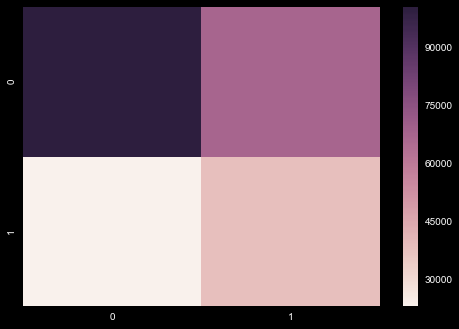

In [301]:
confuse = metrics.confusion_matrix(y_test,LogR.predict(X_test)) 
print (metrics.classification_report(y_test,LogR.predict(X_test)))
sns.heatmap(confuse)

In [303]:
DTC = DecisionTreeClassifier(class_weight="balanced")
DTC.fit(X_train,y_train)
metrics.accuracy_score(y_test, DTC.predict(X_test))

0.60577794825301623

             precision    recall  f1-score   support

          0       0.81      0.60      0.69    168132
          1       0.36      0.62      0.46     61292

avg / total       0.69      0.61      0.63    229424



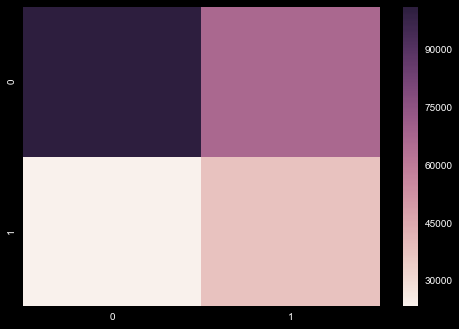

In [304]:
confuse = metrics.confusion_matrix(y_test,DTC.predict(X_test)) 
print (metrics.classification_report(y_test,DTC.predict(X_test)))
sns.heatmap(confuse)

In [305]:
RFC = RandomForestClassifier(class_weight="balanced")
RFC.fit(X_train,y_train)
metrics.accuracy_score(y_test, RFC.predict(X_test))

0.60763913104121625

             precision    recall  f1-score   support

          0       0.81      0.61      0.69    168132
          1       0.36      0.61      0.45     61292

avg / total       0.69      0.61      0.63    229424



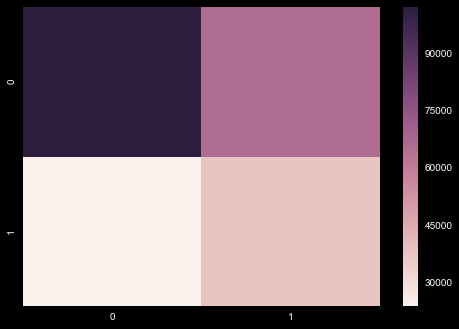

In [306]:
confuse = metrics.confusion_matrix(y_test,RFC.predict(X_test)) 
print (metrics.classification_report(y_test,RFC.predict(X_test)))
sns.heatmap(confuse)

In [307]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train1 = scaling.transform(X_train)
X_test1 = scaling.transform(X_test)
SVC = LinearSVC(class_weight='balanced', verbose = True)
SVC.fit(X_train1,y_train)
metrics.accuracy_score(y_test, SVC.predict(X_test1))

[LibLinear]

0.60323244298765599

             precision    recall  f1-score   support

          0       0.81      0.60      0.69    168132
          1       0.36      0.62      0.46     61292

avg / total       0.69      0.60      0.63    229424



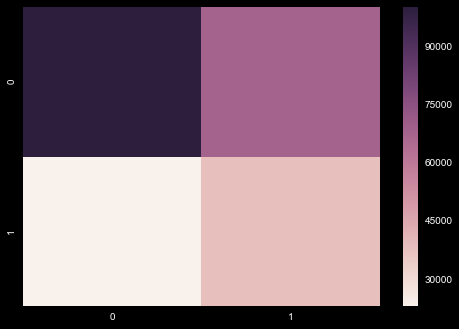

In [308]:
confuse = metrics.confusion_matrix(y_test,SVC.predict(X_test1)) 
print (metrics.classification_report(y_test,SVC.predict(X_test1)))
sns.heatmap(confuse)

In [ ]:
/c

In [309]:
import xgboost as xgb

In [310]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier(scale_pos_weight = 2)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

             precision    recall  f1-score   support

          0       0.79      0.76      0.77    168132
          1       0.40      0.44      0.42     61292

avg / total       0.68      0.67      0.68    229424



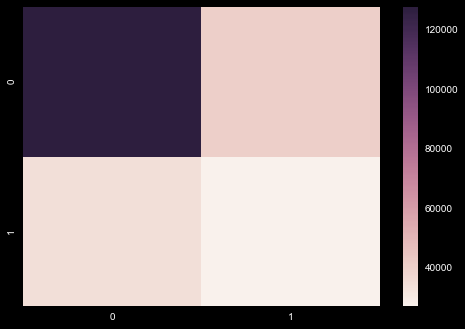

In [311]:
confuse = metrics.confusion_matrix(y_test, y_pred) 
print (metrics.classification_report(y_test, y_pred))
sns.heatmap(confuse)

In [312]:
metrics.accuracy_score(y_test, y_pred)

0.67391816026222195

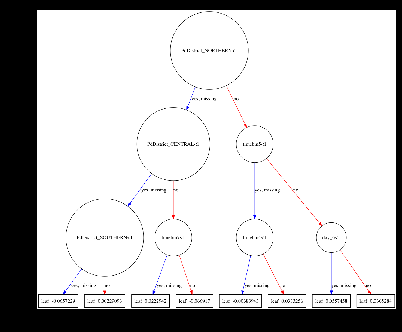

In [313]:
import graphviz
xgb.plot_tree(model)

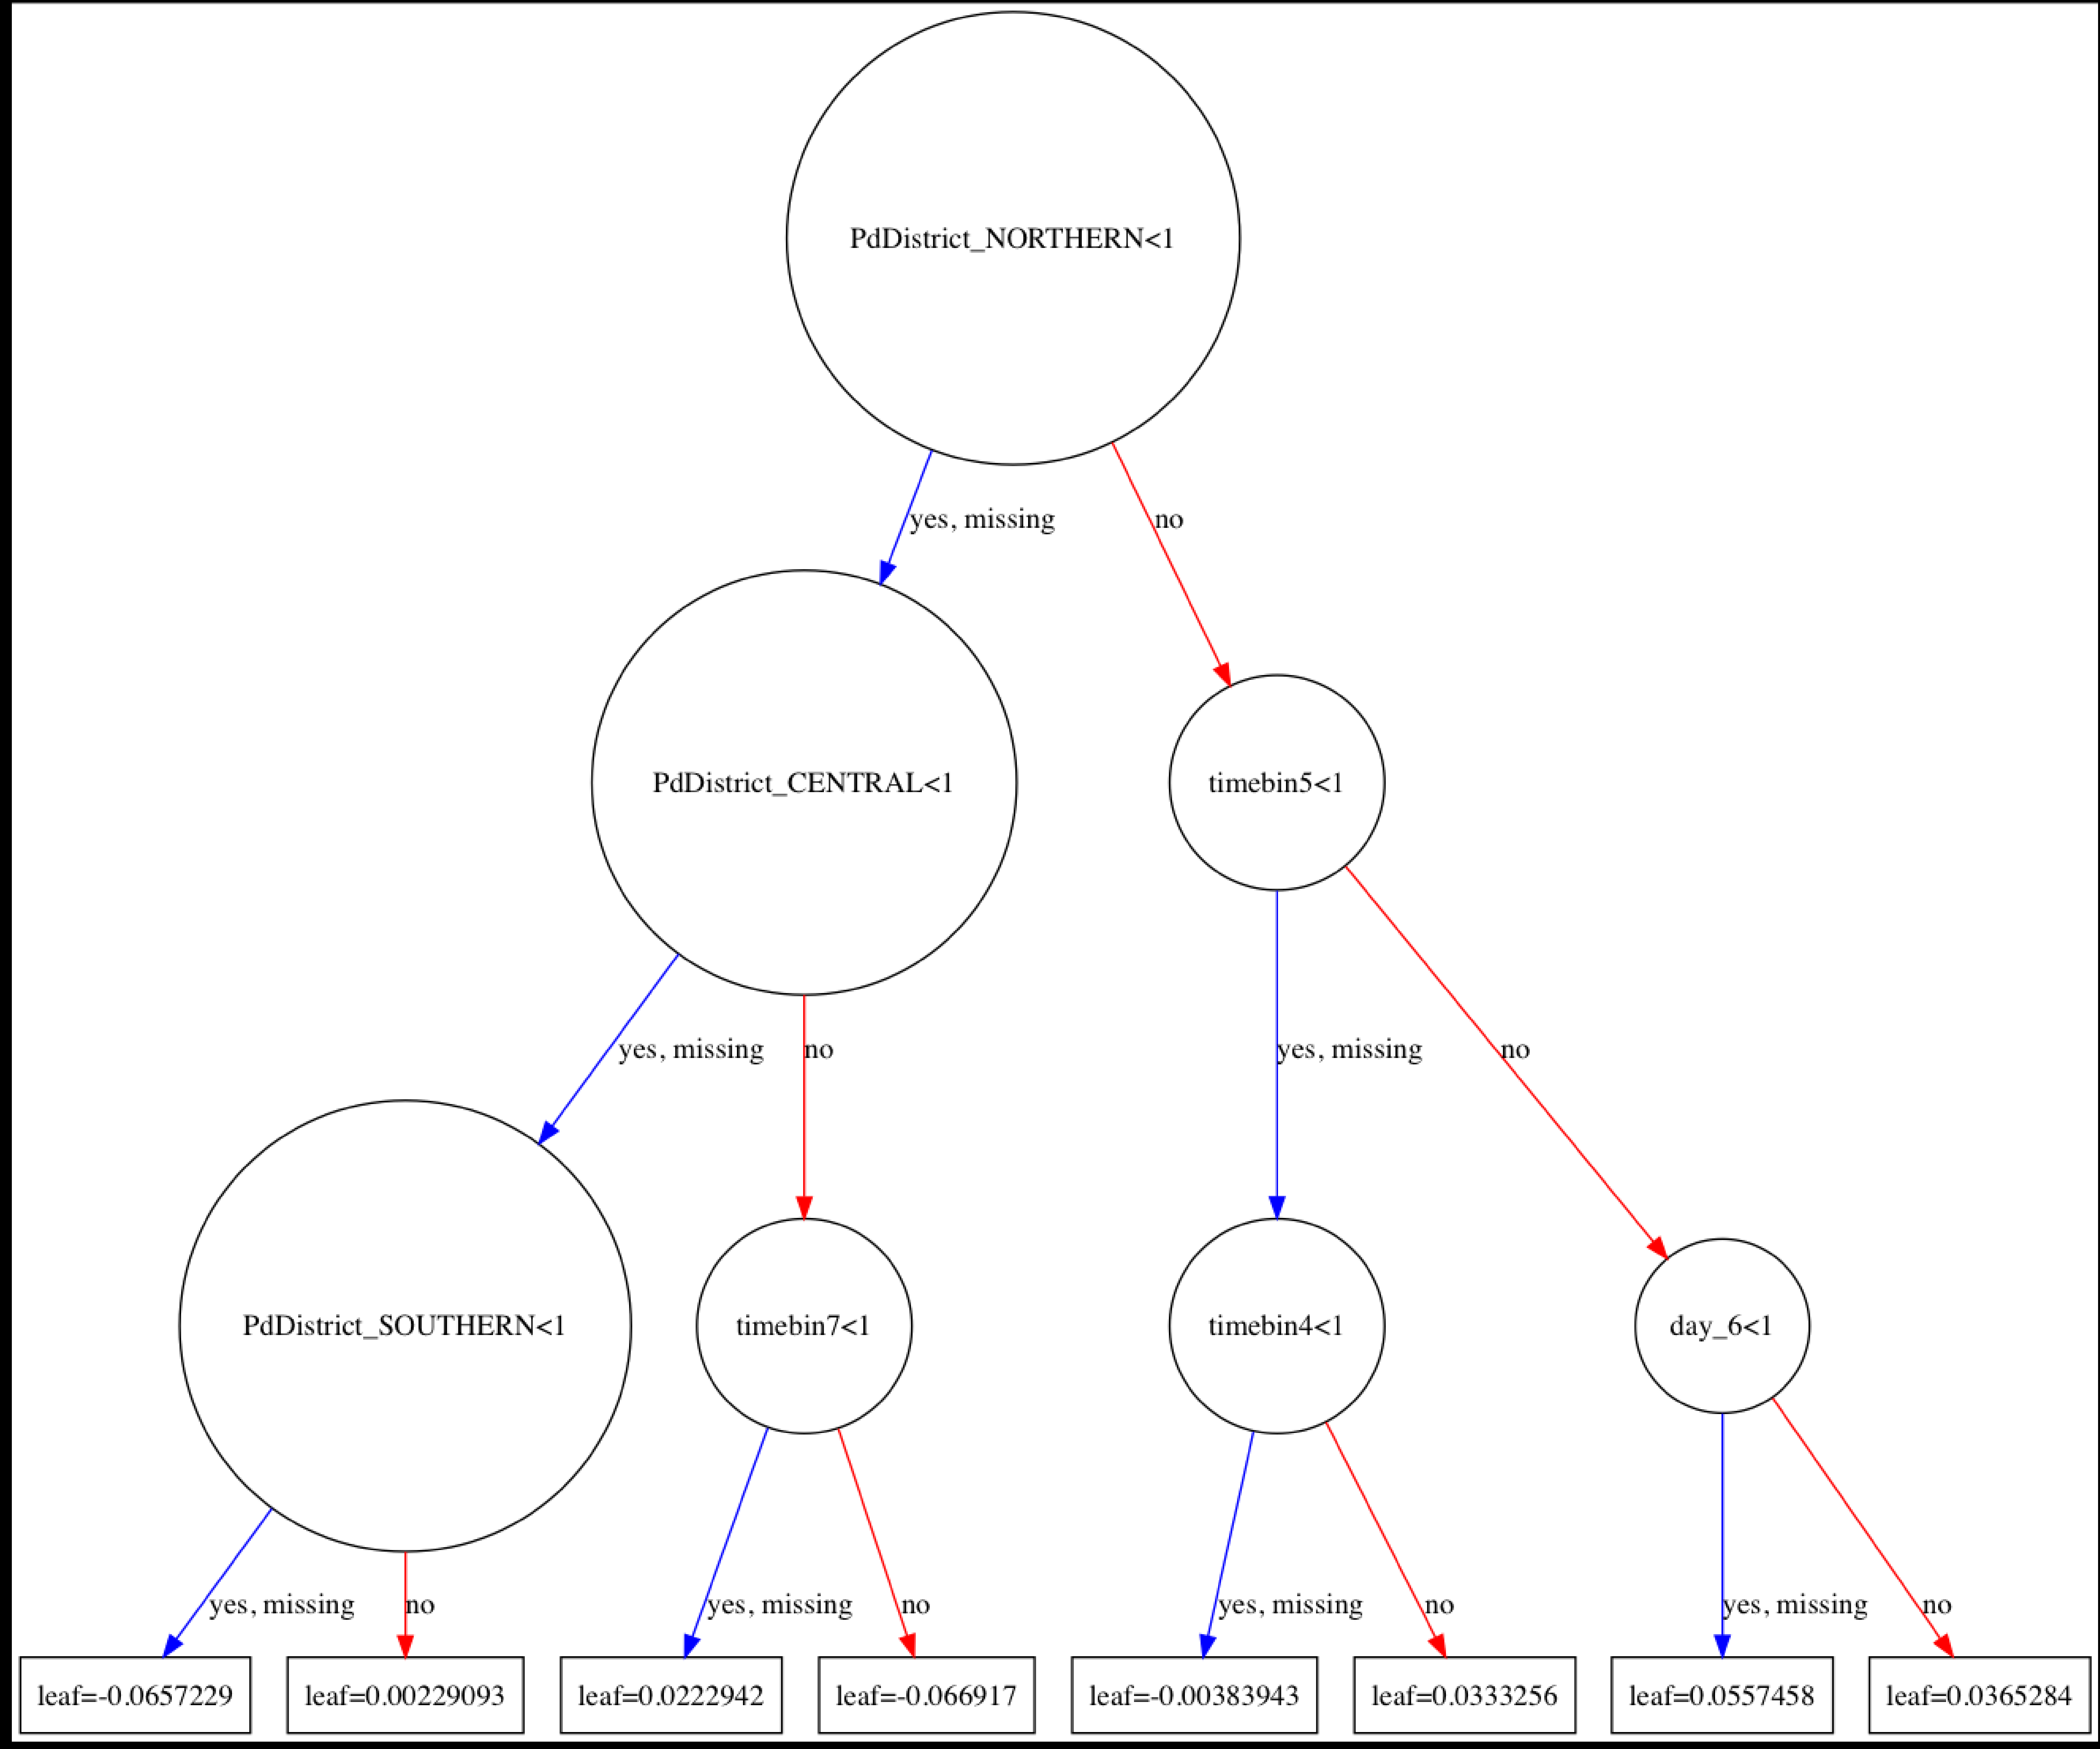

In [314]:
xgb.plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

In [315]:
from sklearn.ensemble import GradientBoostingClassifier

In [316]:
def modelfit(alg, predictors, performCV=True, printFeatureImportance=True, cv_folds=2):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        

    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, alg.predict(X_test)))
    

    feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances', figsize=(20, 5))
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.7328


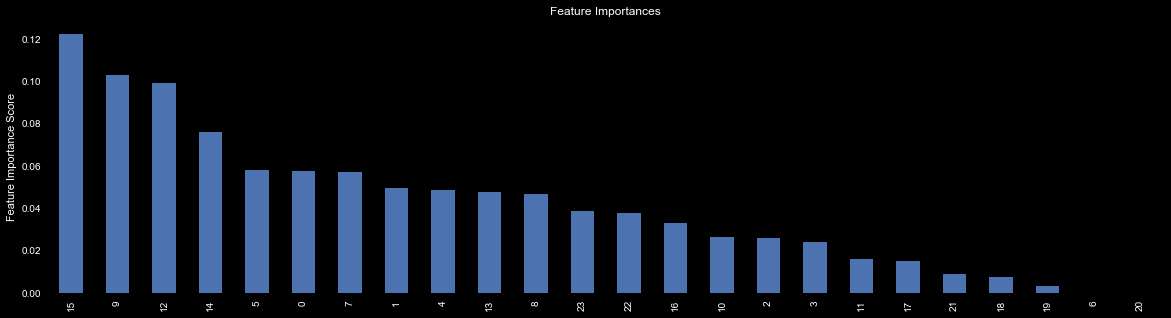

In [317]:
predictors = [x for x in X_train.columns]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, predictors)

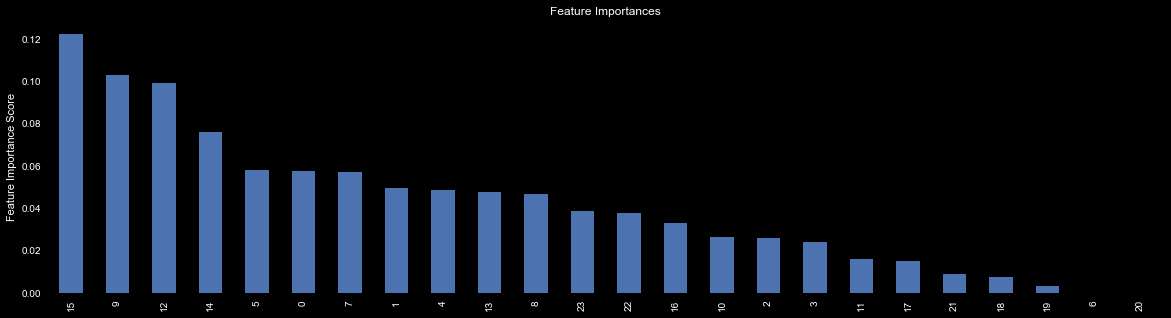

In [318]:
feat_imp = pd.Series(gbm0.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(20, 5))
plt.ylabel('Feature Importance Score')

             precision    recall  f1-score   support

          0       0.73      1.00      0.85    168132
          1       0.49      0.00      0.00     61292

avg / total       0.67      0.73      0.62    229424



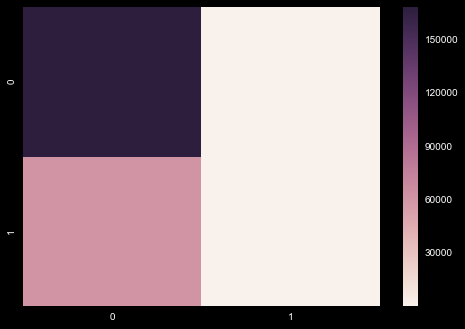

In [319]:
confuse = metrics.confusion_matrix(y_test,gbm0.1predict(X_test)) 
print (metrics.classification_report(y_test,gbm0.predict(X_test)))
sns.heatmap(confuse)

In [320]:
pca = decomposition.PCA(n_components=2)
pca.fit(c.drop(['Category','DayOfWeek','binary','Zipcode','DateTime','hour'],axis=1))
c_pca = pca.transform(c.drop(['Category','DayOfWeek','binary','Zipcode','DateTime','hour'],axis=1))

In [321]:
c_pca.shape

(764746, 2)

In [322]:
all_pca = pd.concat([pd.DataFrame(c_pca), c.reset_index()['binary']], axis=1, ignore_index=True)

In [323]:
all_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764746 entries, 0 to 764745
Data columns (total 3 columns):
0    764746 non-null float64
1    764746 non-null float64
2    764746 non-null int64
dtypes: float64(2), int64(1)
memory usage: 17.5 MB


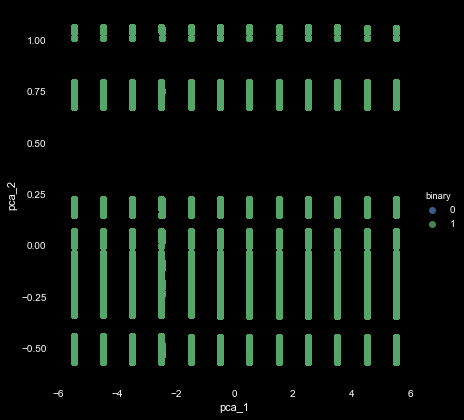

In [324]:
all_pca.columns = ['pca_1', 'pca_2', 'binary']


sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'text.color': 'white', 
             'xtick.color': 'white', 'ytick.color': 'white', 'axes.labelcolor': 'white', 'axes.edgecolor': 'white'} )

sns.lmplot('pca_1', 'pca_2', data = all_pca, hue='binary', fit_reg=False, size=6)
plt.savefig('pca.png')

In [325]:
X, y = all_pca.drop('binary', axis=1), all_pca['binary']
X2_train, X2_test, y2_train, y2_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [326]:
RFC = RandomForestClassifier(class_weight="balanced")
RFC.fit(X2_train,y2_train)
metrics.accuracy_score(y2_test, RFC.predict(X2_test))

0.60930417044424301

             precision    recall  f1-score   support

          0       0.81      0.61      0.70    168078
          1       0.36      0.61      0.46     61346

avg / total       0.69      0.61      0.63    229424



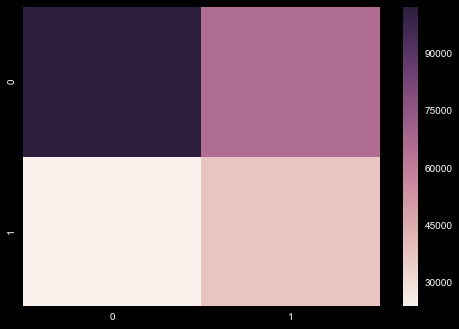

In [328]:
confuse = metrics.confusion_matrix(y2_test,RFC.predict(X2_test)) 
print (metrics.classification_report(y2_test,RFC.predict(X2_test)))
sns.heatmap(confuse)

# Multiclass Classification

In [192]:
c.head()

,Category,DayOfWeek,Zipcode,DateTime,binary,hour,month,timebin1,timebin2,timebin3,...,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,day_1,day_2,day_3,day_4,day_5,day_6
0,BURGLARY,Sunday,94114,2017-12-31 16:00:00,0,16,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,VANDALISM,Sunday,94114,2017-12-31 16:00:00,0,16,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,LARCENY/THEFT,Sunday,94114,2017-12-31 14:30:00,1,14,12,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,LARCENY/THEFT,Sunday,94114,2017-12-31 23:00:00,1,23,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,LARCENY/THEFT,Sunday,94114,2017-12-31 17:30:00,1,17,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [216]:
mis = c

In [217]:
mis = mis.drop('binary', axis =1)

In [225]:
mis.head()

,Category,DayOfWeek,Zipcode,DateTime,hour,month,timebin1,timebin2,timebin3,timebin4,...,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,day_1,day_2,day_3,day_4,day_5,day_6
0,BURGLARY,Sunday,94114,2017-12-31 16:00:00,16,12,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,VANDALISM,Sunday,94114,2017-12-31 16:00:00,16,12,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,LARCENY/THEFT,Sunday,94114,2017-12-31 14:30:00,14,12,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,LARCENY/THEFT,Sunday,94114,2017-12-31 23:00:00,23,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,LARCENY/THEFT,Sunday,94114,2017-12-31 17:30:00,17,12,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [227]:
multitrainset = mis
multitrainset['res'] = 0
multitrainset['res'] = np.where(multitrainset['Category'] == 'LARCENY/THEFT', 1, multitrainset['res'])
multitrainset['res'] = np.where(multitrainset['Category'] == 'OTHER OFFENSES', 2, multitrainset['res'])
multitrainset['res'] = np.where(multitrainset['Category'] == 'NON-CRIMINAL', 3, multitrainset['res'])
multitrainset['res'] = np.where(multitrainset['Category'] == 'ASSAULT', 4, multitrainset['res'])

In [229]:
mis.tail()

,Category,DayOfWeek,Zipcode,DateTime,hour,month,timebin1,timebin2,timebin3,timebin4,...,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,day_1,day_2,day_3,day_4,day_5,day_6,res
764741,NON-CRIMINAL,Thursday,94129,2013-01-10 14:05:00,14,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,3
764742,BAD CHECKS,Thursday,94129,2013-01-10 14:05:00,14,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
764743,FORGERY/COUNTERFEITING,Thursday,94129,2013-01-10 14:05:00,14,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
764744,LARCENY/THEFT,Saturday,94129,2013-01-05 11:00:00,11,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
764745,VANDALISM,Wednesday,94129,2013-01-02 03:20:00,3,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [231]:
Xm, ym = mis.drop(['Category','DayOfWeek','res','Zipcode','DateTime','hour'],axis=1), mis['res']

In [232]:
Xm_train, Xm_test, ym_train, ym_test = cross_validation.train_test_split(Xm, ym, test_size=0.3)

In [245]:
LogR = LogisticRegression(solver = 'sag', multi_class = 'multinomial', class_weight="balanced" )
LogR.fit(Xm_train,ym_train)
metrics.accuracy_score(ym_test, LogR.predict(Xm_test))

0.24990410767835972

             precision    recall  f1-score   support

          0       0.47      0.05      0.10     90359
          1       0.38      0.51      0.44     61476
          2       0.17      0.24      0.20     29408
          3       0.17      0.29      0.21     28341
          4       0.12      0.30      0.18     19840

avg / total       0.34      0.25      0.22    229424



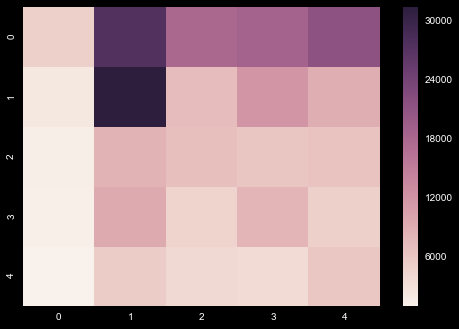

In [246]:
confuse = metrics.confusion_matrix(ym_test,LogR.predict(Xm_test)) 
print (metrics.classification_report(ym_test,LogR.predict(Xm_test)))
sns.heatmap(confuse)

In [234]:
RFC = RandomForestClassifier(class_weight="balanced")
RFC.fit(Xm_train,ym_train)
metrics.accuracy_score(ym_test, RFC.predict(Xm_test))

0.25637248064718599

             precision    recall  f1-score   support

          0       0.45      0.13      0.21     90359
          1       0.39      0.44      0.42     61476
          2       0.16      0.25      0.20     29408
          3       0.16      0.23      0.19     28341
          4       0.12      0.28      0.17     19840

avg / total       0.33      0.26      0.26    229424



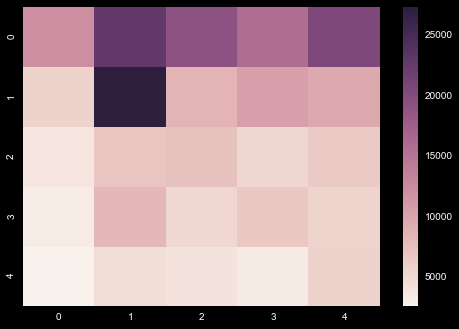

In [236]:
confuse = metrics.confusion_matrix(ym_test,RFC.predict(Xm_test)) 
print (metrics.classification_report(ym_test,RFC.predict(Xm_test)))
sns.heatmap(confuse)

In [257]:
xg_train = xgb.DMatrix(Xm_train, label=ym_train)
xg_test = xgb.DMatrix(Xm_test, label=ym_test)

In [269]:
param = {}
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 5

In [270]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 5
bst = xgb.train(param, xg_train, num_round, watchlist)

[0]	train-merror:0.582268	test-merror:0.582428
[1]	train-merror:0.5827	test-merror:0.582668
[2]	train-merror:0.582606	test-merror:0.582812
[3]	train-merror:0.582606	test-merror:0.582812
[4]	train-merror:0.582575	test-merror:0.582716


In [271]:
pred = bst.predict(xg_test)

In [272]:
error_rate = np.sum(pred != ym_test) / ym_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

Test error using softmax = 0.5827158448985285


In [273]:
stats.describe(pred)

DescribeResult(nobs=229424, minmax=(0.0, 1.0), mean=0.28031942, variance=0.20174126, skewness=0.9781946539878845, kurtosis=-1.0431345352739598)

In [329]:
model = XGBClassifier(scale_pos_weight = 1, num_class = 5, objective = 'multi:softmax')
model.fit(Xm_train, ym_train)
# make predictions for test data
ym_pred = model.predict(Xm_test)

             precision    recall  f1-score   support

          0       0.42      0.80      0.55     90359
          1       0.41      0.38      0.39     61476
          2       0.00      0.00      0.00     29408
          3       0.00      0.00      0.00     28341
          4       0.00      0.00      0.00     19840

avg / total       0.28      0.42      0.32    229424



/Users/mitdhami/anaconda/envs/cs189/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


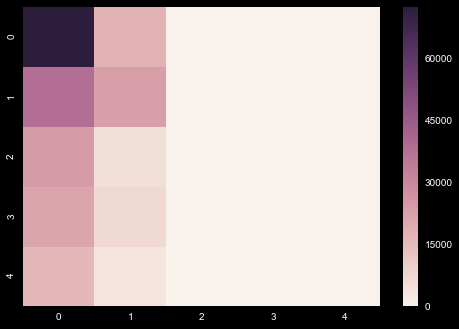

In [330]:
confuse = metrics.confusion_matrix(ym_test, ym_pred) 
print (metrics.classification_report(ym_test, ym_pred))
sns.heatmap(confuse)

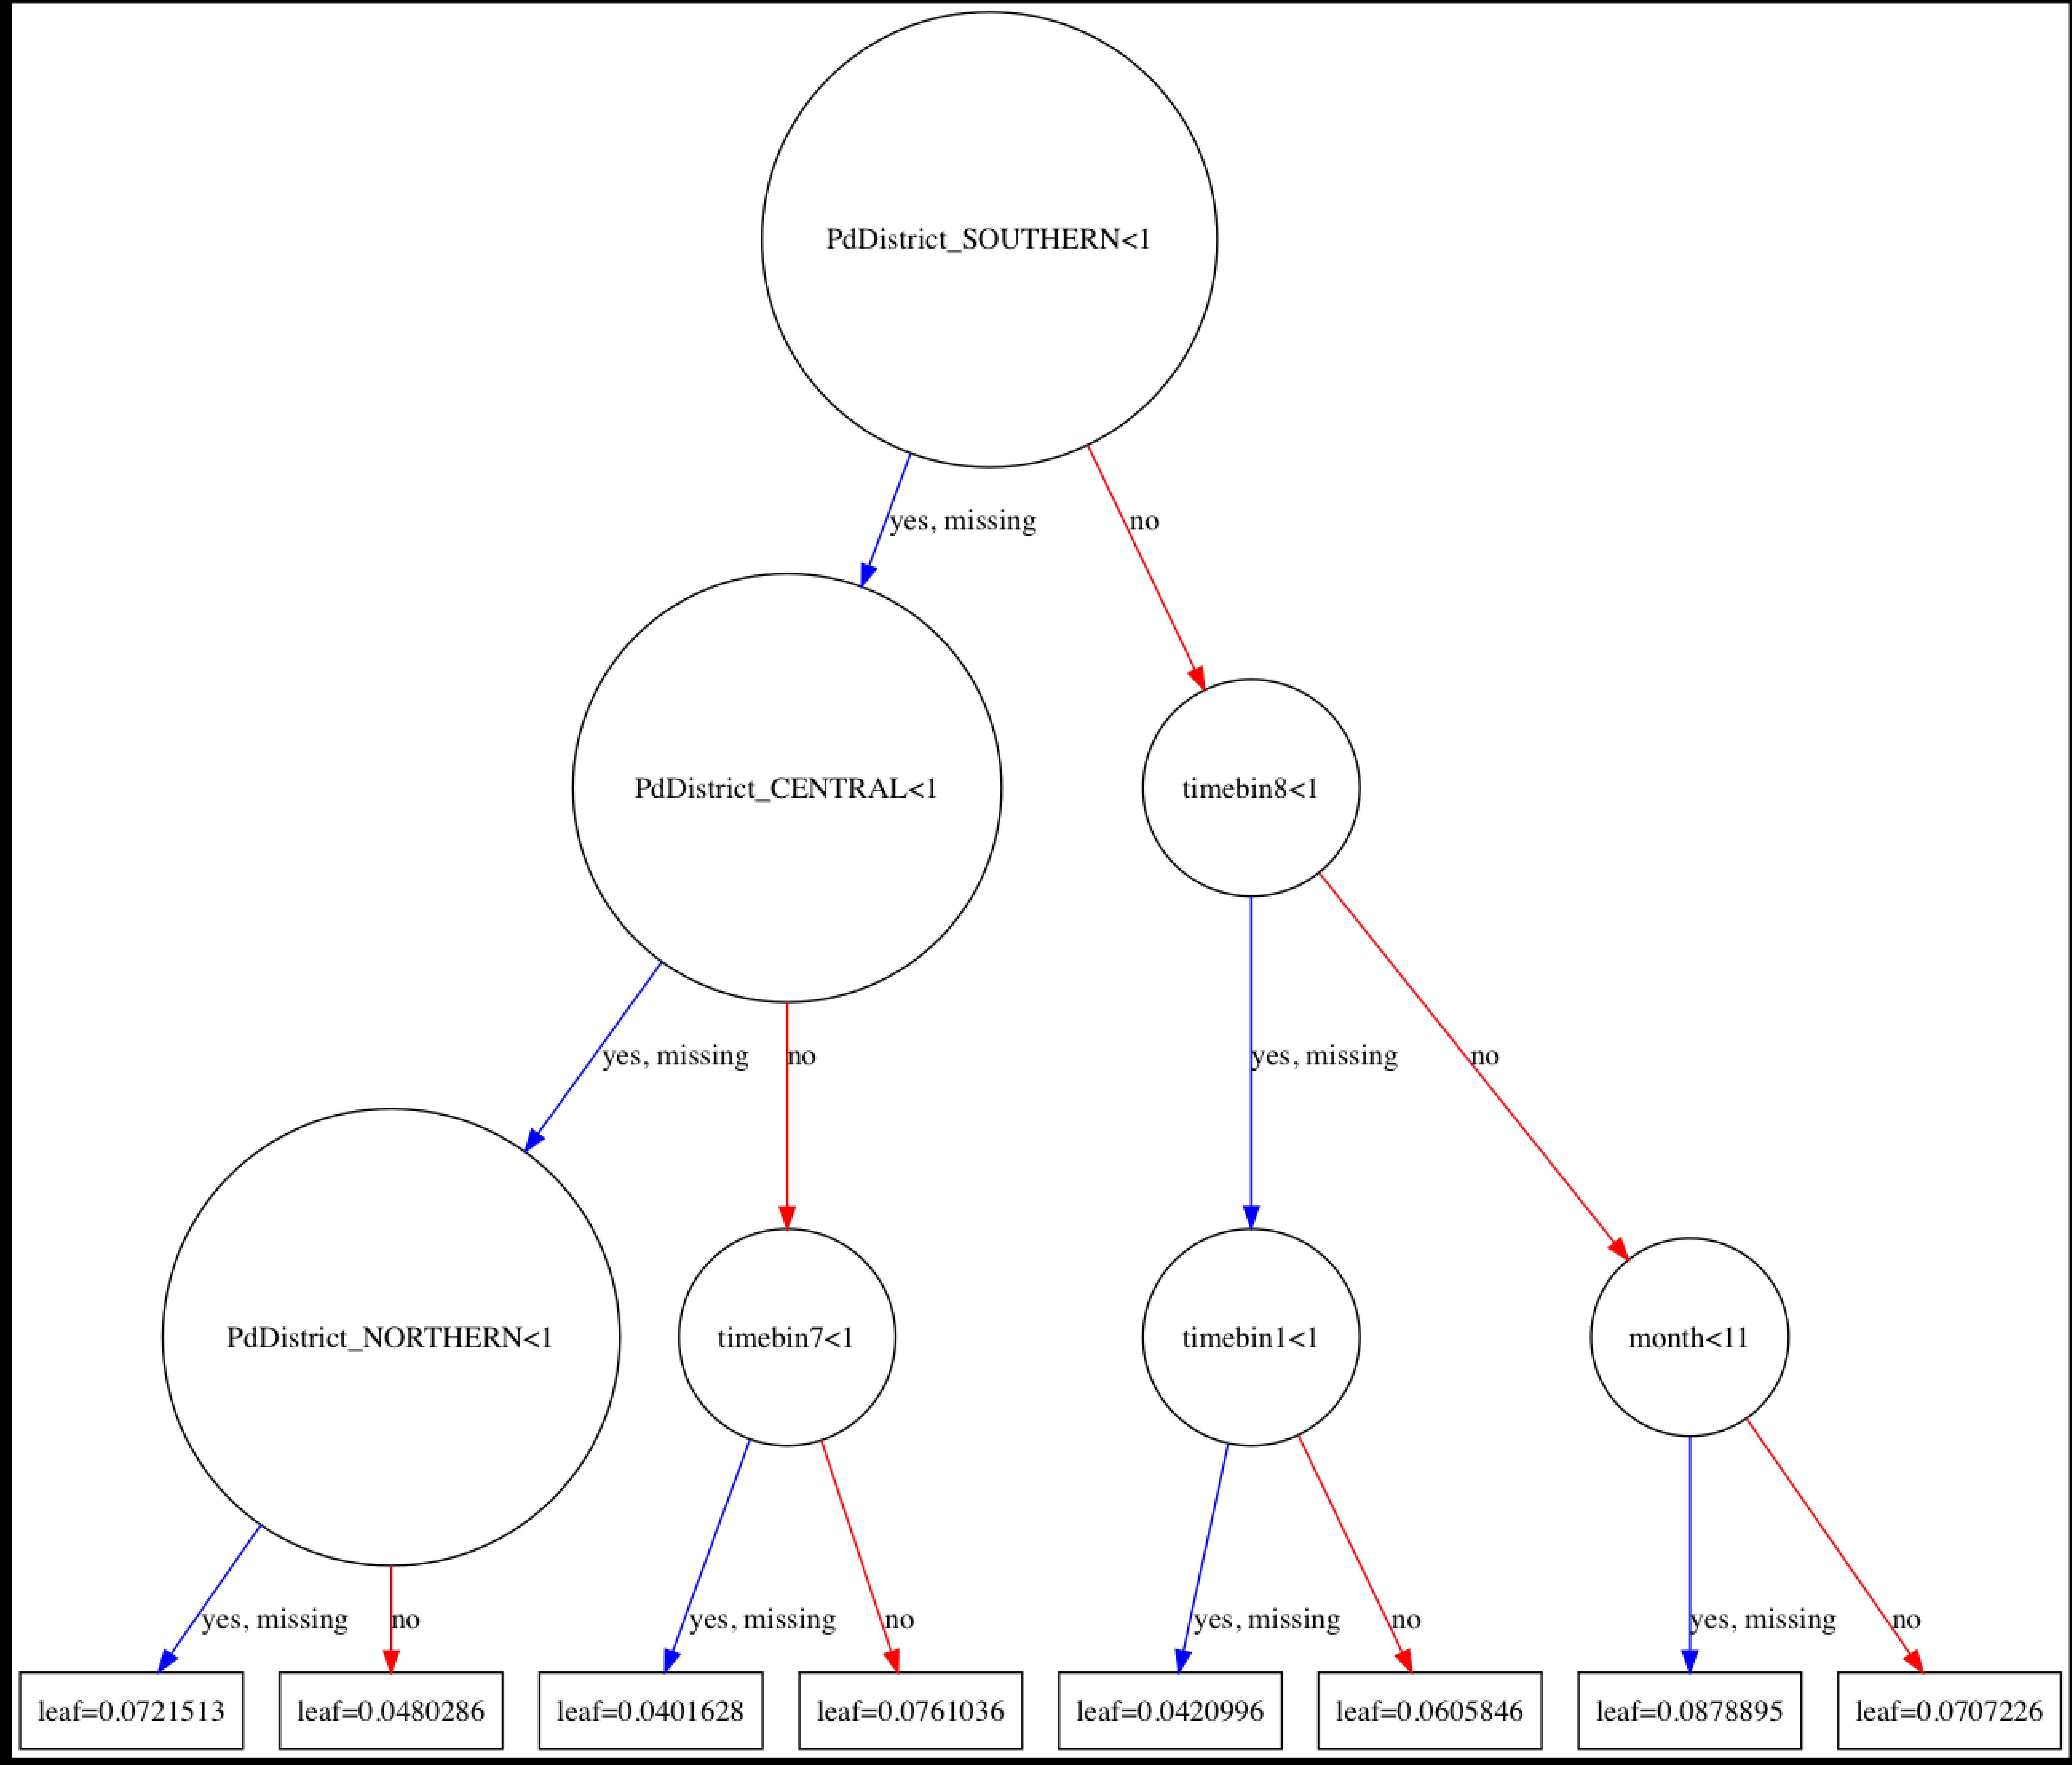

In [256]:
xgb.plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

In [280]:
1 - (c['binary'].sum()/ c['binary'].count())

0.73235950237072178